In [803]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit



In [804]:
data = pd.read_csv("./data.csv")
print(data.head())

# subjects n = 78
n_subjects = max(data["subject"])
n_blocks = max(data["block"])
print("n blocks: ", n_blocks)

train_data = data[data["subject"] < (n_subjects - 10)]
test_data = data[data["subject"] >= (n_subjects - 10)]

rt_data_name = "RT_trimmed" # or RT || log_RT_trimmed

y_train = train_data[rt_data_name].to_numpy()
y_test = test_data[rt_data_name].to_numpy()

# -- Special --  ##
all_y = data[rt_data_name].to_numpy()

X_train = train_data["shape_num"].to_numpy()
X_test = test_data["shape_num"].to_numpy()

print(X_train[1])
print(y_train[1])


"""
Size of trial: 24 * 24
"""

def gen_data(d):
    data = np.empty((0, 24))
    for index in d:
        #print("item?: ", index)
        # Create an array of zeros with length 24
        result_array = np.zeros(24)
        result_array[d[index] - 1] = 1
        data = np.vstack((data, result_array))
    return data

X_train = gen_data(X_train)
X_test = gen_data(X_test)

X_train = np.reshape(X_train, (X_train.shape[0], 1, 24))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 24))

print(X_train[0])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)




   subject         ave          sd  block  triplet  position  shape_num    RT  \
0        1  463.309028  298.476633      1        1         1          1  1121   
1        1  463.309028  298.476633      1        1         2          2   886   
2        1  463.309028  298.476633      1        1         3          3   837   
3        1  463.309028  298.476633      1        7         1         19   843   
4        1  463.309028  298.476633      1        7         2         20  1264   

    RT_trimmed  log_RT_trimmed  change?  block>12  block>18  block>6  \
0  1060.262293        6.966272        1     False     False    False   
1   886.000000        6.786717        0     False     False    False   
2   837.000000        6.729824        0     False     False    False   
3   843.000000        6.736967        0     False     False    False   
4  1060.262293        6.966272        1     False     False    False   

   1-avg(2,3)  log_1-avg(2,3) odd_even  
0         NaN             NaN        o 

In [805]:
# def build_network(learning_rate: float = 0.0003):
def build_network(learning_rate: float = 0.0003):
     model = tf.keras.Sequential()
     model.add(tf.keras.Input(shape=(24, 24)))
     model.add(tf.keras.layers.SimpleRNN(units=64, return_sequences = False, activation = "linear"))
     model.add(tf.keras.layers.Dense(1, activation = "linear")) # Linear voor RT's
     model.compile(optimizer = 
         tf.keras.optimizers.Adam(
            learning_rate = learning_rate), 
            loss='mean_squared_error', # voor regressie op RT's
            metrics=[
               tf.keras.metrics.mean_squared_error,
               tf.keras.metrics.mean_absolute_error,
               tf.keras.metrics.mean_absolute_percentage_error]
            )
     return model

In [806]:
def train_model():
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    res = model.fit(X_train, y_train, epochs = 30, batch_size=24, validation_data = (X_test, y_test), verbose=1)
    return res

In [807]:
def show_res(res, verbose: bool = False):
    print(res.history.keys())
    if verbose:
        print(res.history)
    fig, axs = plt.subplots(2,2)
    axs[0, 0].set_title("training loss")
    axs[0, 0].plot(res.history["loss"])
    axs[0, 1].set_title("mean_squared_error")
    axs[0, 1].plot(res.history["mean_squared_error"])
    axs[1, 0].set_title("val_mean_absolute_percentage_error")
    axs[1, 0].plot(res.history["val_mean_absolute_percentage_error"])
    axs[1, 1].set_title("val_mean_absolute_error")
    axs[1, 1].plot(res.history["val_mean_absolute_error"])
    plt.show()

(35136, 1, 24) (35136,) (5184, 1, 24) (5184,)
Epoch 1/100
1464/1464 [==============================] - 2s 753us/step - loss: 1126700.7213 - mean_squared_error: 1126700.7212 - mean_absolute_error: 777.1270 - mean_absolute_percentage_error: 98.7992 - val_loss: 1684450.3750 - val_mean_squared_error: 1684450.3750 - val_mean_absolute_error: 921.4377 - val_mean_absolute_percentage_error: 91.8477
Epoch 2/100
1464/1464 [==============================] - 1s 658us/step - loss: 1086803.6743 - mean_squared_error: 1086803.6743 - mean_absolute_error: 722.4494 - mean_absolute_percentage_error: 84.8897 - val_loss: 1496486.2500 - val_mean_squared_error: 1496486.2500 - val_mean_absolute_error: 813.6837 - val_mean_absolute_percentage_error: 72.9066
Epoch 3/100
1464/1464 [==============================] - 1s 814us/step - loss: 887425.7680 - mean_squared_error: 887425.8290 - mean_absolute_error: 602.4819 - mean_absolute_percentage_error: 61.4977 - val_loss: 1286240.6250 - val_mean_squared_error: 1286240.62

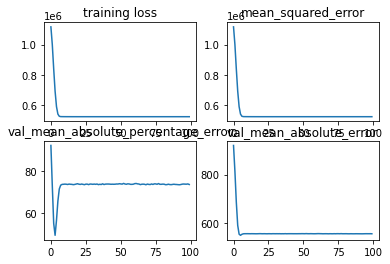

In [808]:
model = build_network()
res = train_model()
model.summary()

show_res(res)

[[824.5606 ]
 [796.66455]
 [768.86804]
 [814.4403 ]
 [761.6614 ]
 [764.0419 ]
 [805.4567 ]
 [776.9494 ]
 [759.82605]
 [803.0728 ]
 [770.85077]
 [765.8    ]
 [778.5761 ]
 [775.90247]
 [523.4785 ]
 [816.3225 ]
 [770.1581 ]
 [758.8772 ]
 [827.8601 ]
 [807.1891 ]
 [783.5415 ]
 [791.0404 ]
 [740.7241 ]
 [768.86804]]
[[816.3225 ]
 [770.1581 ]
 [758.8772 ]
 [791.0404 ]
 [740.7241 ]
 [768.86804]
 [805.4567 ]
 [776.9494 ]
 [759.82605]
 [824.5606 ]
 [796.66455]
 [768.86804]
 [803.0728 ]
 [770.85077]
 [765.8    ]
 [778.5761 ]
 [775.90247]
 [523.4785 ]
 [814.4403 ]
 [761.6614 ]
 [764.0419 ]
 [827.8601 ]
 [807.1891 ]
 [783.5415 ]]
[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]]


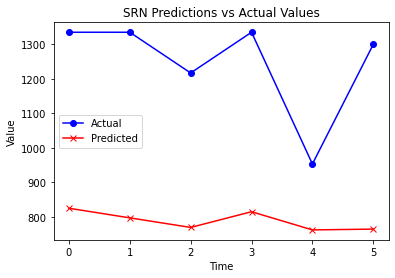

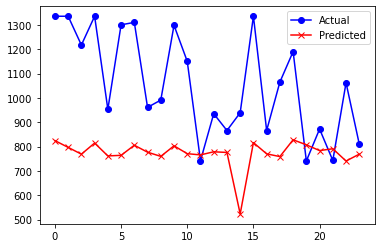

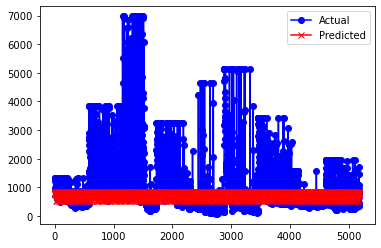

In [809]:
# Show 6 following (3x2)
plt.plot(y_test[:6], label='Actual', color='blue', marker='o')
plt.plot(model.predict(X_test)[:6], label='Predicted', color='red', marker='x')

# Check if model predicts unique and not same 24
print(model.predict(X_test)[:24])
print(model.predict(X_test)[24:48])
print(model.predict(X_test)[:24] == model.predict(X_test)[24:48])

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SRN Predictions vs Actual Values')
plt.legend()
plt.show()

# Show 1 block
plt.plot(y_test[:24], label='Actual', color='blue', marker='o')
plt.plot(model.predict(X_test)[:24], label='Predicted', color='red', marker='x')

plt.legend()
plt.show()

# All test data
plt.plot(y_test, label='Actual', color='blue', marker='o')
plt.plot(model.predict(X_test), label='Predicted', color='red', marker='x')

plt.legend()
plt.show()

Question: While it can predict pattern of increase RT after presentation, doesn't seem to be predicting larger whole decrease over trials

shape full:  (72, 24, 3)
shape;  (72, 24) (72, 24) (72, 24)
RT: 1007.6173187256944 950.0825255729168 942.4843111822918
log-transofrmed RT: 6.603442502171013 6.558994466716343 6.557637208326447
online measure shape:  (72, 24)
--> 0.1819719041843646


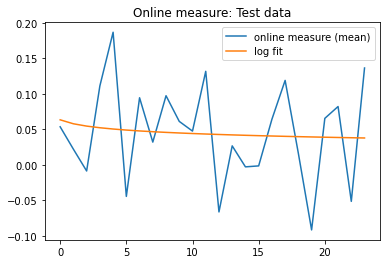

shape full:  (72, 24, 3)
shape;  (72, 24) (72, 24) (72, 24)
RT: 807.66626 775.01245 736.6626
log-transofrmed RT: 6.6939597 6.6525764 6.5948296
online measure shape:  (72, 24)
--> 0.065439224


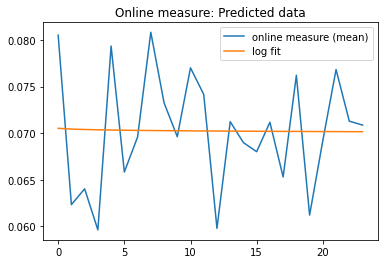

shape full:  (560, 24, 3)
shape;  (560, 24) (560, 24) (560, 24)
RT: 834.5221229060863 798.8069684598884 790.6033008233409
log-transofrmed RT: 6.427755401534558 6.392093019528584 6.384974467753364
online measure shape:  (560, 24)
--> -0.22930464472090417


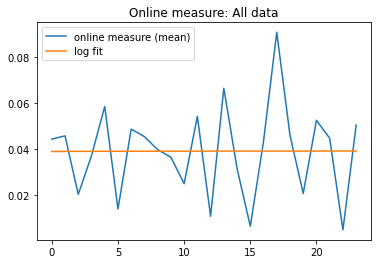

In [810]:
pred = model.predict(X_test)
new_y_test = y_test.reshape(-1, 1)
all_y = all_y.reshape(-1, 1)

pred_reshaped = pred.reshape(-1, 3)
test_reshaped = new_y_test.reshape(-1, 3)
y_reshaped = all_y.reshape(-1, 3)

testing_reshaped = test_reshaped.reshape(-1, 24, test_reshaped.shape[1])
predicted_reshaped = pred_reshaped.reshape(-1, 24, pred_reshaped.shape[1])
# Sanity test
all_reshaped = y_reshaped.reshape(-1, 24, y_reshaped.shape[1])


# Logarithmic function
def logarithmic_func(x, a, b):
    return a * np.log(x) + b

# Apply a log fit curve to the online measure
def fit_log(x_data, y_data):
    # Fit the model
    params, covariance = curve_fit(logarithmic_func, x_data, y_data)
    # Extract the parameters
    a, b = params
    # Generate fitted y values
    y_fit = logarithmic_func(x_data, a, b)
    return y_fit

def data_anal(data, label):
    print("shape full: ", data.shape)
    # Values
    first_column = data[:, :, 0]
    second_column = data[:, :, 1]
    third_column = data[:, :, 2]
    
    print("shape; ", first_column.shape, second_column.shape, third_column.shape)

    # Bereken online_measure
    online_measure = np.log(first_column) - ( (np.log(second_column) + np.log(third_column)) / 2 )
    # Alternatief
    # online_measure = np.log(first_column) - np.mean(np.log(np.stack((second_column, third_column), axis=-1)), axis=-1)
    
    print("RT:", np.mean(first_column), np.mean(second_column), np.mean(third_column))
    print("log-transofrmed RT:", np.mean(np.log(first_column)), np.mean(np.log(second_column)), np.mean(np.log(third_column)))
    
    # Fit log to online measure
    fit = fit_log(range(1,24+1), np.mean(online_measure, axis=0))

    print("online measure shape: ", online_measure.shape)
    print("-->", online_measure[0,1]) # compare with real datasheet

    plt.plot(np.mean(online_measure, axis=0), label="online measure (mean)")
    plt.plot(fit, label="log fit")
    
    plt.title(f"Online measure: {label}")
    plt.legend()
    plt.show()


data_anal(data=testing_reshaped, label="Test data")
data_anal(data=predicted_reshaped, label="Predicted data")
data_anal(data=all_reshaped, label="All data")

